In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
from matplotlib import pyplot as plt


In [2]:
import os

In [3]:
os.getcwd()

'/home/dadubovs/projects/deep_query_optimization/dqo/estimator/neo'

In [4]:
root_path = "/home/dadubovs/projects/deep_query_optimization/"

import sys
sys.path.insert(0, root_path)

In [5]:
from dqo.estimator.neo.query_estimator import NeoQueryEstimator

import os

schema_file = os.path.join(root_path, 'dqo/data/job/data/schematext.sql')

In [11]:
input_path = os.path.join(root_path, 'dqo/data/input/sql/fast/')

In [7]:
input_path = os.path.join(root_path, 'dqo/data/input/sql/slow/')

In [12]:
neo = NeoQueryEstimator(input_path, schema_file=schema_file)

In [13]:
neo.load_db_schema()

In [14]:
neo.encode_data()

Reading data from /home/dadubovs/projects/deep_query_optimization/dqo/data/input/sql/fast/fast_query_log.csv
Reading data from /home/dadubovs/projects/deep_query_optimization/dqo/data/input/sql/fast/fast_query_log.csv.1
Reading data from /home/dadubovs/projects/deep_query_optimization/dqo/data/input/sql/fast/fast_query_log.csv.2
Reading data from /home/dadubovs/projects/deep_query_optimization/dqo/data/input/sql/fast/fast_query_log.csv.3
Reading data from /home/dadubovs/projects/deep_query_optimization/dqo/data/input/sql/fast/fast_query_log.csv.4
Reading data from /home/dadubovs/projects/deep_query_optimization/dqo/data/input/sql/fast/fast_query_log.csv.5
Reading data from /home/dadubovs/projects/deep_query_optimization/dqo/data/input/sql/fast/fast_query_log.csv.6
Reading data from /home/dadubovs/projects/deep_query_optimization/dqo/data/input/sql/fast/fast_query_log.csv.7
Reading data from /home/dadubovs/projects/deep_query_optimization/dqo/data/input/sql/fast/fast_query_log.csv.back


In [15]:
neo.normalize()

In [16]:
neo.compile()

In [22]:
neo.train(epochs=20, verbose=True,patience=20)

Train on 63931 samples, validate on 15983 samples
Epoch 1/20
63931/63931 [==============================] - 7s 110us/sample - loss: 0.0052 - accuracy: 3.1284e-05 - mae: 0.0526 - mse: 0.0052 - val_loss: 0.0113 - val_accuracy: 0.0000e+00 - val_mae: 0.0771 - val_mse: 0.0113
Epoch 2/20
63931/63931 [==============================] - 7s 110us/sample - loss: 0.0051 - accuracy: 3.1284e-05 - mae: 0.0519 - mse: 0.0051 - val_loss: 0.0114 - val_accuracy: 0.0000e+00 - val_mae: 0.0777 - val_mse: 0.0114
Epoch 3/20
63931/63931 [==============================] - 7s 110us/sample - loss: 0.0050 - accuracy: 3.1284e-05 - mae: 0.0513 - mse: 0.0050 - val_loss: 0.0115 - val_accuracy: 0.0000e+00 - val_mae: 0.0772 - val_mse: 0.0115
Epoch 4/20
63931/63931 [==============================] - 7s 109us/sample - loss: 0.0049 - accuracy: 3.1284e-05 - mae: 0.0508 - mse: 0.0049 - val_loss: 0.0112 - val_accuracy: 0.0000e+00 - val_mae: 0.0768 - val_mse: 0.0112
Epoch 5/20
63931/63931 [==============================] - 7s 1

In [18]:
neo.evaluate_train()

{'mean_diff': 0.8142157722218629, 'mean_ratio': 4.499762900475551}

In [19]:
neo.evaluate_test()

{'mean_diff': 0.7057371365162265, 'mean_ratio': 13.230762926795544}

In [20]:
history = neo.history

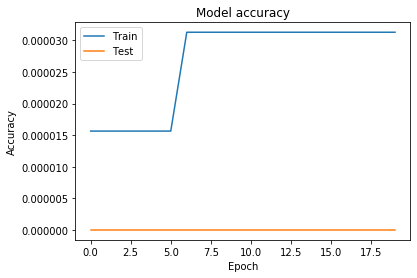

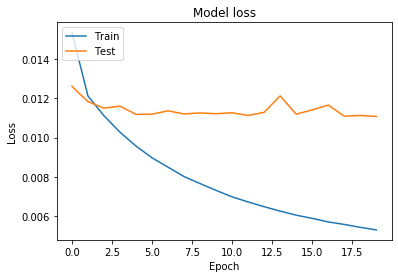

In [21]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
neo.data.describe()

,runtime
count,51858.000000
mean,4.864241
std,18.697416
min,0.001249
25%,0.021013
50%,1.974375
75%,2.824804
max,310.017579
